# Project 1, Part 1, Executive Questions: Sales Specific Questions

University of California, Berkeley
Master of Information and Data Science (MIDS) program
w205 - Fundamentals of Data Engineering

Student: John (Jack) Galvin

Year: 2022

Semester: Spring

Section: 9


# Included Modules and Packages

Code cell containing your includes for modules and packages

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import psycopg2

# Supporting code

Code cells containing any supporting code, such as connecting to the database, any functions, etc.  Remember you can use any code from the labs.

In [2]:
# Function to run a select query and return rows in a pandas dataframe
# Pandas puts all numeric values from postgres to float
# If it will fit in an integer, change it to integer


def my_select_query_pandas(query, rollback_before_flag, rollback_after_flag):
    "function to run a select query and return rows in a pandas dataframe"
    
    if rollback_before_flag:
        connection.rollback()
    
    df = pd.read_sql_query(query, connection)
    
    if rollback_after_flag:
        connection.rollback()
    
    # fix the float columns that really should be integers
    
    for column in df:
    
        if df[column].dtype == "float64":

            fraction_flag = False

            for value in df[column].values:
                
                if not np.isnan(value):
                    if value - math.floor(value) != 0:
                        fraction_flag = True

            if not fraction_flag:
                df[column] = df[column].astype('Int64')
    
    return(df)

In [3]:
# Connect to Postgres

connection = psycopg2.connect(
    user = "postgres",
    password = "ucb",
    host = "postgres",
    port = "5432",
    database = "postgres"
)

In [4]:
# Create a cursor for the connection

cursor = connection.cursor()

# Instructions for Specific Questions

For each specific quesion, you must write 1 and only 1 query that answers that specific question.  The results of your query must be displayed in a Pandas dataframe as demonstrated in the labs

All output should be sorted.

For store name, use the city name the store is located in.

When sorting by store name, sort in alphabetical order.

For month, use the full month name: January, February, March, etc.

When sorting by month, sort in calendar order: January, February, March, etc.  You may find it useful to include a month number to help with the sort.  It's ok to leave it in the output.

For day of week, use the full day of week name: Sunday, Monday, Tuesday, etc.

When sorting by day of week, sort in day of week order: Sunday, Monday, Tuesday, etc. You may find it usefule to include a day of week number to help with the sort.  It's ok to leave it in the output.


# 1.1.1 Total Sales as a Dollar Amount for all of AGM

In [5]:
rollback_before_flag = True
rollback_after_flag = True

query = """

select sum(total_amount) as total_sales 
from sales

"""

my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)

,total_sales
0,98739408


# 1.1.2 Total Sales as a Dollar Amount by Store

Sort by store name in alphabetical order

In [6]:
rollback_before_flag = True
rollback_after_flag = True

query = """

select s.city as store, 
        sum(sa.total_amount) as total_sales
from stores as s 
     join sales as sa 
         on s.store_id = sa.store_id
group by s.city
order by store

"""

my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)

,store,total_sales
0,Berkeley,25041060
1,Dallas,19408260
2,Miami,17692404
3,Nashville,14573172
4,Seattle,22024512


# 1.1.3 Total Sales as a Dollar Amount by Month

Sort by month full name in calendar order

In [7]:
rollback_before_flag = True
rollback_after_flag = True

query = """

select extract(month from sale_date) as moy, 
        to_char(sale_date, 'Month') as month, 
        sum(total_amount) as total_sales
from sales
group by moy, month
order by moy

"""

my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)

,moy,month,total_sales
0,1,January,7803828
1,2,February,7574280
2,3,March,8779620
3,4,April,8251284
4,5,May,7977840
5,6,June,8124108
6,7,July,7993044
7,8,August,9029808
8,9,September,7578960
9,10,October,8895108


# 1.1.4 Total Sales as a Dollar Amount by Store and Month

Sort by store name in alphabetical order, then by month full name in calendar order

In [8]:
rollback_before_flag = True
rollback_after_flag = True

query = """

select s.city as store,
        extract(month from sa.sale_date) as moy,
        to_char(sa.sale_date, 'Month') as month,
        sum(sa.total_amount) as total_sales
from stores as s
    join sales as sa
        on s.store_id = sa.store_id
group by store, moy, month
order by store, moy

"""

my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)

,store,moy,month,total_sales
0,Berkeley,1,January,1988904
1,Berkeley,2,February,1930272
2,Berkeley,3,March,2224500
3,Berkeley,4,April,2092056
4,Berkeley,5,May,2019264
5,Berkeley,6,June,2065140
6,Berkeley,7,July,2034708
7,Berkeley,8,August,2286732
8,Berkeley,9,September,1922256
9,Berkeley,10,October,2248008


# 1.1.5 Total Sales as a Dollar Amount by Day of Week

Sort by day of week in day of week order.

In [21]:
rollback_before_flag = True
rollback_after_flag = True

query = """

select extract(dow from sale_date) as dow, 
        to_char(sale_date, 'Day') as day, 
        sum(total_amount) as total_sales
from sales
group by dow, day
order by dow

"""

my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)

,dow,day,total_sales
0,0,Sunday,18589068
1,1,Monday,13167720
2,2,Tuesday,6895332
3,3,Wednesday,13952556
4,4,Thursday,13834644
5,5,Friday,12878628
6,6,Saturday,19421460


# 1.1.6 Total Sales as a Dollar Amount by Store and Day of Week

Sort by store name in alphabetical order, then by day of week in day of week order.

In [10]:
rollback_before_flag = True
rollback_after_flag = True

query = """

select s.city as store,
        extract(dow from sa.sale_date) as dow,
        to_char(sa.sale_date, 'Day') as day,
        sum(sa.total_amount) as total_sales
from stores as s
    join sales as sa
        on s.store_id = sa.store_id
group by store, dow, day
order by store, dow

"""

my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)

,store,dow,day,total_sales
0,Berkeley,0,Sunday,4694640
1,Berkeley,1,Monday,3340116
2,Berkeley,2,Tuesday,1752036
3,Berkeley,3,Wednesday,3546144
4,Berkeley,4,Thursday,3507660
5,Berkeley,5,Friday,3273240
6,Berkeley,6,Saturday,4927224
7,Dallas,0,Sunday,3650748
8,Dallas,1,Monday,2602980
9,Dallas,2,Tuesday,1352760


# 1.1.7 Total Number of Sales for all of AGM

In [26]:
rollback_before_flag = True
rollback_after_flag = True

query = """

select count(distinct store_id || '-' || sale_id) as total_txns
from sales

"""

my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)

,total_txns
0,1537617


# 1.1.8 Total Number of Sales by Store

Sort by store name in alphabetical order

In [27]:
rollback_before_flag = True
rollback_after_flag = True

query = """

select s.city as store, 
        count(distinct sa.store_id || '-' || sa.sale_id) as total_txns
from stores as s 
     join sales as sa 
         on s.store_id = sa.store_id
group by s.city
order by store

"""

my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)

,store,total_txns
0,Berkeley,390375
1,Dallas,302120
2,Miami,275074
3,Nashville,227721
4,Seattle,342327


# 1.1.9 Average Dollar Amount per Sale 

In [30]:
rollback_before_flag = True
rollback_after_flag = True

query = """

select count(distinct store_id || '-' || sale_id) as total_txns, 
        sum(total_amount) as total_sales, 
        (sum(total_amount) / count(distinct store_id || '-' || sale_id)) as avg_per_txn
from sales

"""

my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)

,total_txns,total_sales,avg_per_txn
0,1537617,98739408,64.215866


# 1.1.10 Average Dollar Amount per Sale by Store

Sort by store name in alphabetical order

In [34]:
rollback_before_flag = True
rollback_after_flag = True

query = """

select s.city as store, 
        count(distinct sa.store_id || '-' || sa.sale_id) as total_txns, 
        sum(sa.total_amount) as total_sales, 
        (sum(sa.total_amount) / count(distinct sa.store_id || '-' || sa.sale_id)) as avg_per_txn 
from stores as s 
     join sales as sa 
         on s.store_id = sa.store_id
group by s.city
order by store

"""

my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)

,store,total_txns,total_sales,avg_per_txn
0,Berkeley,390375,25041060,64.146167
1,Dallas,302120,19408260,64.240236
2,Miami,275074,17692404,64.318707
3,Nashville,227721,14573172,63.995732
4,Seattle,342327,22024512,64.337642


# 1.1.11 The Executives have also asked you to provide your best example of a data visualization for one of the above queries

You may choose any one of the above queries. 

It's best to select the one that you think will provide the most interesting data visualization.  

You are allowed to add a pivot as demonstrated in the labs if it is needed for your data visualization. 

In [133]:
# Store the below query as df

rollback_before_flag = True
rollback_after_flag = True

query = """

select s.city as store,
        extract(month from sa.sale_date) as moy,
        to_char(sa.sale_date, 'Month') as month,
        sum(sa.total_amount) as total_sales
from stores as s
    join sales as sa
        on s.store_id = sa.store_id
group by store, moy, month
order by store, moy

"""

my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)

df = my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)
df

,store,moy,month,total_sales
0,Berkeley,1,January,1988904
1,Berkeley,2,February,1930272
2,Berkeley,3,March,2224500
3,Berkeley,4,April,2092056
4,Berkeley,5,May,2019264
5,Berkeley,6,June,2065140
6,Berkeley,7,July,2034708
7,Berkeley,8,August,2286732
8,Berkeley,9,September,1922256
9,Berkeley,10,October,2248008


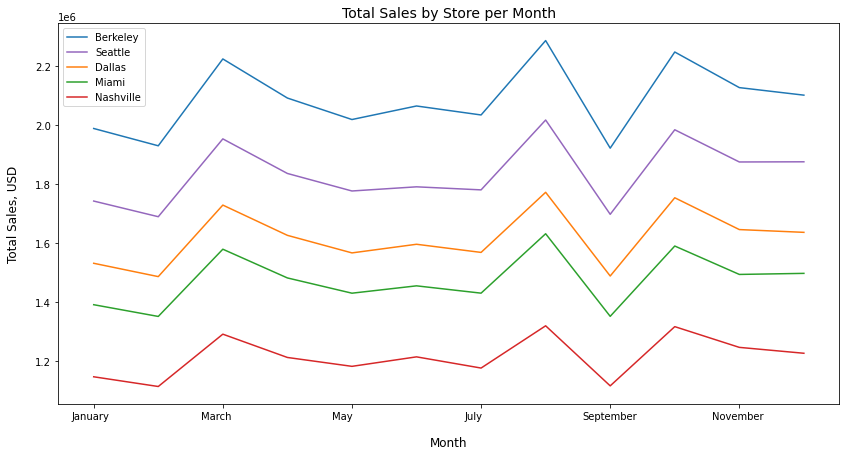

In [134]:
# Plot the results of the query
fig, ax = plt.subplots()
fig = df.groupby(["month", "store"], sort=False)["total_sales"].sum().unstack(level=1).plot(figsize=(14,7), ax=ax)

# Change order of legend
handles, labels = plt.gca().get_legend_handles_labels()
order = [0, 4, 1, 2, 3]
plt.legend([handles[idx] for idx in order], [labels[idx] for idx in order])

# Add titles and axes labels
plt.title("Total Sales by Store per Month", fontsize=14)
ax.set_ylabel("Total Sales, USD", labelpad=15, fontsize=12)
ax.set_xlabel("Month", labelpad=15, fontsize=12);